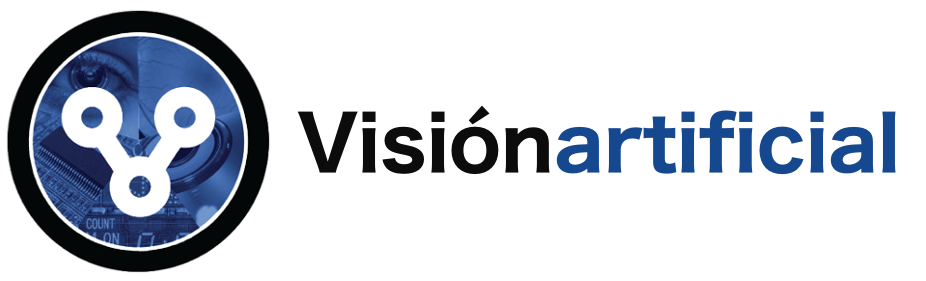

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

## Atopando esquinas

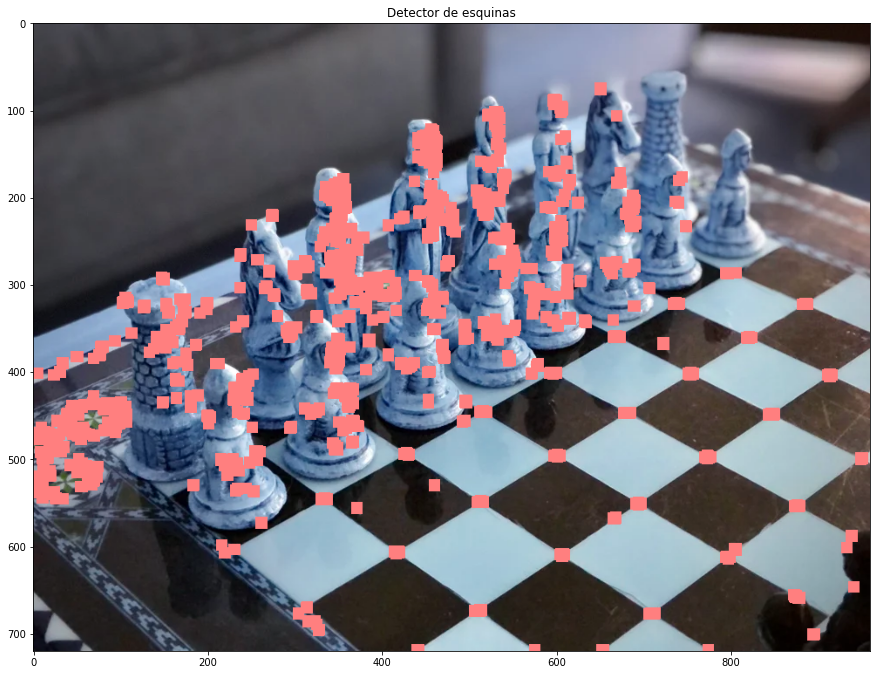

In [1]:
import cv2
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# Cargamos a imaxe
image = cv2.imread('../data/chess.png')
if image is None:
    print("Imaxe non atopada")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# A funcion cornerHarris require un array de tipo float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#Empregamos unha dilatación para expandir as esquinas
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Limiar para un valor optimo que dependera da imaxe de entrada.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

plt.figure(figsize=[15,15])
plt.imshow(image);plt.title("Detector de esquinas"); plt.show()


#### O detector de esquinas de Harris é un algoritmo desenvolvido no 1998  (http://www.bmva.org/bmvc/1988/avc-88-023.pdf) e funciona razoablemente ben.

**cv2.cornerHarris**(input image, block size, ksize, k)
- Input image - debe ser unha imaxe de gris e de tipo float32.
- blockSize - O tamanho da vecindade considerado para a detección das esquinas
- ksize - Tamanho da apertuda empregado para achar os gradientes de sobel.
- k - Parametro libre no cirterio de Harris $(det(M)-kTr(M)^2)$
- **Output** – array coas posicións das esquinas detectadas (x,y)




## Mellorando a detección de esquinas empregado cv2.goodFeaturesToTrack

Anteriormente, vimos o detector de esquinas de Harris. Máis tarde, en 1994, J. Shi e C. Tomasi fixeron unha pequena modificación no seu artigo Good Features to Track que mostra mellores resultados en comparación co Harris Corner Detector. A función que mide se un punto é unha esquena no detector de Harris foi dada por:

$R=\lambda_1 \lambda_1 − k(\lambda_1+\lambda_2)^2$

En vez disto, Shi-Tomasi propuxo:

$R=\min(\lambda_1,\lambda_2)$

Se é superior a un valor límite, considérase unha esquina. Se trazamos no espazo $\lambda_1-\lambda_2$ como fixemos no Harris Corner Detector (ver transparencias deste tema), obtemos unha imaxe como a seguinte:

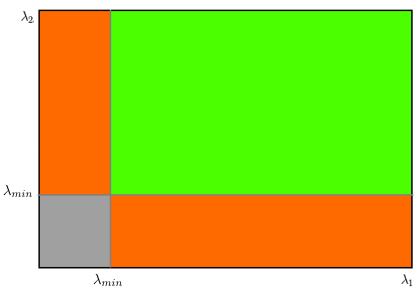

A partir da figura, pódese ver que só cando $\lambda_1$ e $\lambda_2$ están por riba dun valor mínimo, $\lambda_{min}$, considérase unha esquina (rexión verde).

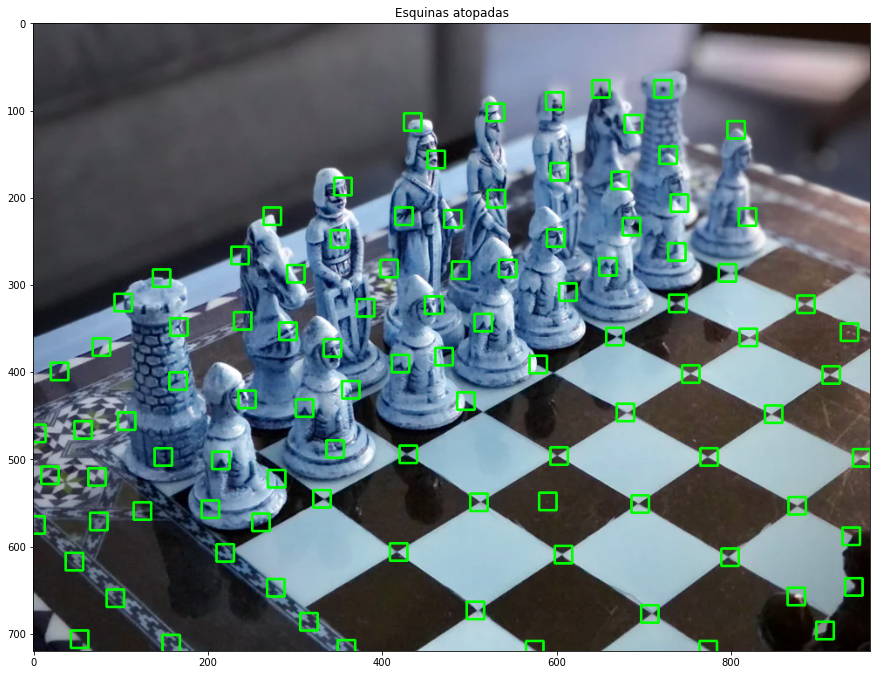

In [2]:
import cv2
import numpy as np

img = cv2.imread('../data/chess.png')
if img is None:
    print("iamxe non atopada")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Especificamos as 100 esquinas mais fortes separadas por mais de 50 pixeles
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 50)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    
plt.figure(figsize=[15,15])
plt.imshow(img);plt.title("Esquinas atopadas"); plt.show()

**cv2.goodFeaturesToTrack**(input image, maxCorners, qualityLevel, minDistance)

- Input Image - imaxe de gris de tipo 8-bit ou  32-bit.
- maxCorners – Máximo número de esquinas que devolverá. Se hai máis esquinas detectadas, soamente devolve as máis fortes.
- qualityLevel – Parámetro que caracteriza a mínima calidade aceptable das esquinas. O valor do parámetro é multiplicado pola medida de calidade (eginvalor mais pequeno) da esquina máis potente. As esquinas cunha medida de calidade inferior ao produto mencionado son rexeitadas. Por exemplo, se a mellor esquina ten unha medida de calidade de = 1500, e o  qualityLevel=0.01 , entón todas as esquinas con menos calidade menor que 15 serán rexeitdas.
- minDistance – Minima distancia Euclidea entre as esquinas detectadas e devoltas.
